# Forecasting with Error-Trend-Seasonal(ETS) Smoothing Method

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

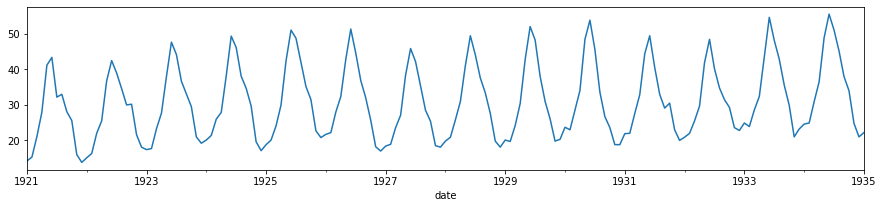

In [18]:
df = pd.read_csv("data/cheese_fred.csv", index_col="date", parse_dates=["date"])
series = df.total_cheese_production
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15, 3));

In [19]:
es = ExponentialSmoothing(X_train, seasonal="add", seasonal_periods=12)
model = es.fit(optimized=True, use_boxcox=True)

C:\Users\IKIN\Miniconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\IKIN\Miniconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\IKIN\Miniconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\IKIN\Miniconda3\envs\jcop_ts\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [20]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

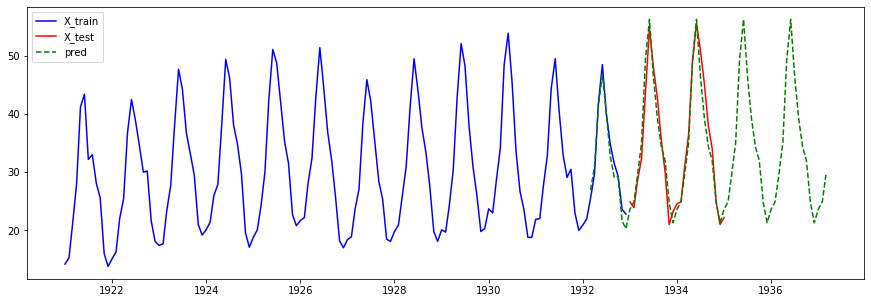

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(X_train, "b", label="X_train")
plt.plot(X_test, "r", label="X_test")
plt.plot(pred, "g--", label="pred")
plt.legend();

# Forecasting with ARIMA model
 

In [10]:
from pmdarima import auto_arima

In [11]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion="aicc", trace=True, suppress_warnings=True, random_state=42)

Performing stepwise search to minimize aicc
Fit ARIMA(2,0,2)x(1,1,1,12) [intercept=True]; AIC=805.862, BIC=827.245, Time=5.872 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=899.922, BIC=905.268, Time=0.122 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=803.454, BIC=814.145, Time=1.304 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=852.518, BIC=863.209, Time=1.066 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=1051.673, BIC=1054.346, Time=0.161 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=802.257, BIC=810.275, Time=0.362 seconds
Fit ARIMA(1,0,0)x(0,1,1,12) [intercept=True]; AIC=803.527, BIC=814.218, Time=0.761 seconds
Fit ARIMA(1,0,0)x(1,1,1,12) [intercept=True]; AIC=805.382, BIC=818.746, Time=1.693 seconds
Fit ARIMA(2,0,0)x(0,1,0,12) [intercept=True]; AIC=801.679, BIC=812.370, Time=0.390 seconds
Fit ARIMA(2,0,0)x(1,1,0,12) [intercept=True]; AIC=803.256, BIC=816.620, Time=1.622 seconds
Fit ARIMA(2,0,0)x(0,1,1,12) [intercept=True

In [12]:
arima

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [13]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Sun, 05 Jun 2022   AIC                            801.679
Time:                                    20:20:40   BIC                            812.370
Sample:                                         0   HQIC                           806.013
                                            - 119                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (Q):                       41.29   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.41   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_forecast)

dates = pd.date_range(X_train.index[-1], periods=n_forecast, freq="M")
pred = pd.Series(pred, index=dates)

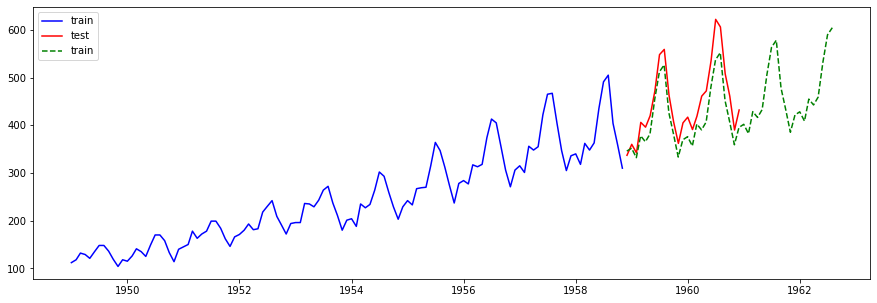

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(X_train, "b-", label="train")
plt.plot(X_test, "r-", label="test")
plt.plot(pred, "g--", label="train")
plt.legend();
